In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import entropy
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from IPython.display import display

In [ ]:
# load data
df = pd.read_csv('Train_data.csv')

In [ ]:
def encodify(dataframe, feature):
    encoder = LabelEncoder()
    encoder.fit(dataframe[feature])
    encoded_feature = encoder.transform(dataframe[feature])
    dataframe[feature] = encoded_feature

In [ ]:
discrete_feature_l = ['protocol_type', 'service', 'flag']
for feature in discrete_feature_l:
    encodify(df, feature)

In [ ]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
# Separate the features and the target
x = df.drop("class", axis=1)
y = df["class"]

In [ ]:
x.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,19,9,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,2,41,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,1,22,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
y.head(5)

0     normal
1     normal
2    anomaly
3     normal
4     normal
Name: class, dtype: object

In [ ]:
# Entropy method
def entropy(y):
    probs = [] # Probabilities of each class label
    for c in set(y): # Set gets a unique set of values. We're iterating over each value
        num_same_class = sum(y == c)  # Remember that true == 1, so we can sum.
        p = num_same_class / len(y) # Probability of this class label
        probs.append(p)
    return np.sum(-p * np.log2(p) for p in probs)

# What is the entropy of the entire set?
print("Entire set entropy = %.2f" % entropy(y))

Entire set entropy = 1.00


<ipython-input-9-7d209e923a65>:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


# Try with 1 feature

In [ ]:
# Let's write some functions that calculates the entropy after splitting on a particular value

def class_probability(feature, y):
    """Calculates the proportional length of each value in the set of instances"""
    # This is doc string, used for documentation
    probs = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        probs.append(float(len(y_new))/len(x))  # Convert to float, because ints don't divide well
    return probs

def class_entropy(feature, y):
    """Calculates the entropy for each value in the set of instances"""
    ents = []
    for value in set(feature):
        select = feature == value # Split by feature value into two classes
        y_new = y[select]         # Those that exist in this class are now in y_new
        ents.append(entropy(y_new))
    return ents

def proportionate_class_entropy(feature, y):
    """Calculatates the weighted proportional entropy for a feature when splitting on all values"""
    probs = class_probability(feature, y)
    ents = class_entropy(feature, y)
    return np.sum(np.multiply(probs, ents)) # Information gain equation

# Let's try calculating the entropy after splitting by all the values in "duration"
new_entropy = proportionate_class_entropy(x["duration"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.05

<ipython-input-9-7d209e923a65>:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


Information gain of 0.05


In [ ]:
# Now let's try doing the same when splitting based upon all values of "service"
new_entropy = proportionate_class_entropy(x["service"], y)
print("Information gain of %.2f" % (entropy(y) - new_entropy))
# Should be an information gain of 0.91

Information gain of 0.67


<ipython-input-9-7d209e923a65>:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


In [ ]:
import operator
entropies = {}
for c in x.columns:
    new_entropy = proportionate_class_entropy(x[c], y)
    entropies[c] = round(entropy(y) - new_entropy, 4)
    # print("%s %.2f" % (c, entropy(y) - new_entropy))

entropies = dict(sorted(entropies.items(), key=operator.itemgetter(1), reverse=True))

for k, v in entropies.items():
  print(f'{k} --- {v}')

<ipython-input-9-7d209e923a65>:8: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(-p * np.log2(p) for p in probs)


src_bytes --- 0.8274
service --- 0.672
dst_bytes --- 0.6485
diff_srv_rate --- 0.5196
flag --- 0.5194
same_srv_rate --- 0.5108
dst_host_srv_count --- 0.481
dst_host_same_srv_rate --- 0.442
dst_host_diff_srv_rate --- 0.4173
dst_host_serror_rate --- 0.4076
logged_in --- 0.4017
dst_host_srv_serror_rate --- 0.3992
count --- 0.395
serror_rate --- 0.3924
srv_serror_rate --- 0.3789
dst_host_srv_diff_host_rate --- 0.2705
dst_host_count --- 0.2017
dst_host_same_src_port_rate --- 0.196
srv_diff_host_rate --- 0.1454
srv_count --- 0.1071
dst_host_srv_rerror_rate --- 0.0915
protocol_type --- 0.0637
rerror_rate --- 0.0594
dst_host_rerror_rate --- 0.0584
srv_rerror_rate --- 0.0539
duration --- 0.0501
hot --- 0.0119
wrong_fragment --- 0.0099
num_compromised --- 0.0067
num_root --- 0.0048
num_access_files --- 0.002
num_file_creations --- 0.0012
is_guest_login --- 0.0011
su_attempted --- 0.0008
root_shell --- 0.0003
num_failed_logins --- 0.0002
num_shells --- 0.0002
land --- 0.0
urgent --- 0.0
num_outbou

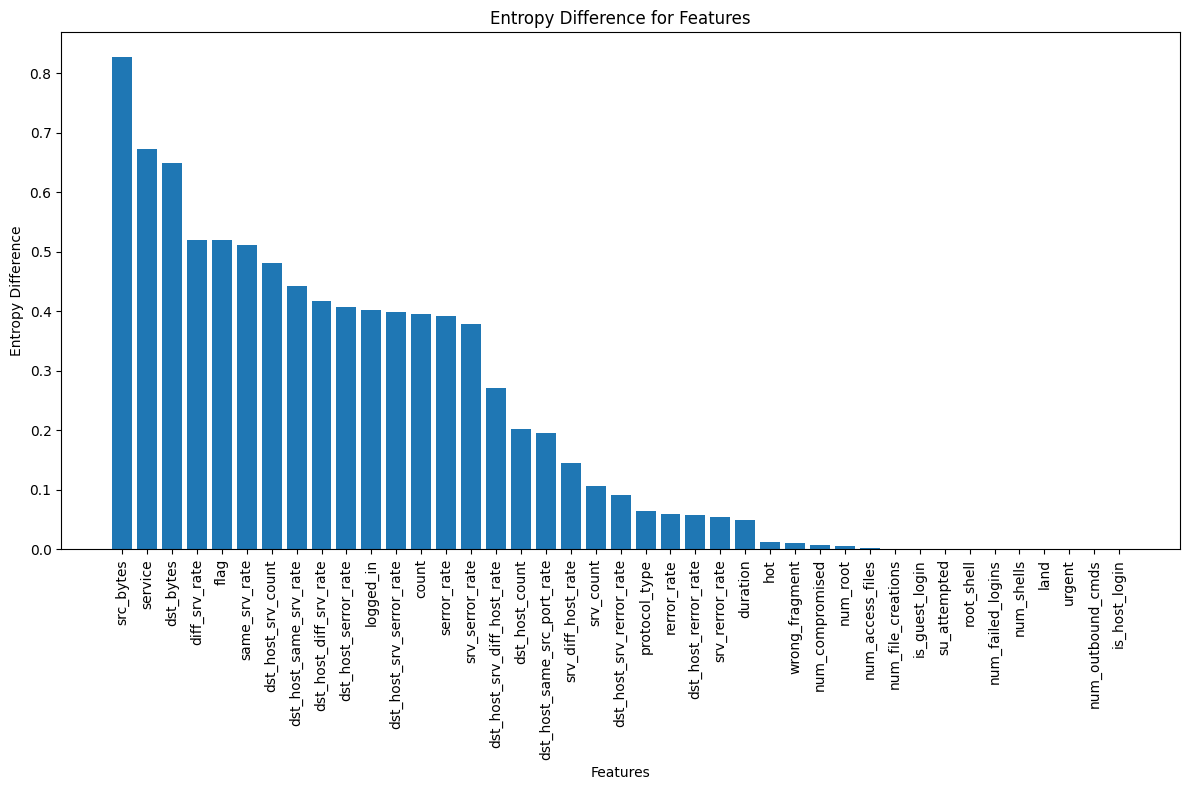

In [ ]:
import matplotlib.pyplot as plt
# Extract the keys and values for plotting
labels = entropies.keys()
values = entropies.values()
# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Entropy Difference')
plt.title('Feature vs. Entropy Difference')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Assuming X is the dataframe containing all the features
X = x

# Number of clusters we want
k = 5

# Create the KMeans object and fit to the data
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels as a new feature to the dataset
X['cluster'] = cluster_labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier and fit to the training data
rf_classifier = RandomForestClassifier(max_depth = 2)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy: 0.9537606667989681

Classification Report:
              precision    recall  f1-score   support

     anomaly       0.98      0.92      0.95      2365
      normal       0.93      0.99      0.96      2674

    accuracy                           0.95      5039
   macro avg       0.96      0.95      0.95      5039
weighted avg       0.96      0.95      0.95      5039


Confusion Matrix:
[[2165  200]
 [  33 2641]]
